#  Classificador de vinhos com o PyCaret

Neste tutorial vamos aprender a criar um classificador de vinhos utilizando o PyCaret, uma biblioteca para machine learning que permite construir modelos de aprendizado de máquina com poucas linhas de código. Também utilizaremos o Streamlit para tornar nosso nodelo em uma aplicação final e pronta para o uso.

## Obtendo o dataset

O dataset que utilizaremos está disponível no site da [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009), este dataset possui dados referentes as características como acidez fixa, volatilidade da acidez, ácido citrico, açúcar residual, etc para permitir a classificação do vinho em uma nota que varia entre 0 e 10.

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *

wine_dataframe = pd.read_csv('winequality-red.csv')

wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Para este estudo de caso, as notas indicando a qualidade do vinho não serão tão interessantes, sendo nosso objetivo final classificar o vinho entre 'bom' e 'ruim'. Para chegar a este objetivo, precisamos ajustar o nosso dataset, definindo uma conversão de quando o vinho será considerado bom e quando será considerado como ruim. Vamos considerar que uma nota igual ou superior a 6 é considerado um bom vinho e qualquer nota abaixo disso será considerado como um vinho ruim.

In [2]:
wine_dataframe.quality = np.where(wine_dataframe.quality >= 6,'Bom', 'Ruim')

wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bom
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Ruim


## Inicializando o ambiente
Antes de tudo, precisamos inicializar o ambiente do PyCaret para que possamos prosseguir com as análises. Observe que vamos passar alguns parâmetros importantes para podermos inicializar o ambiente:

* data - Nossos dados de entrada
* target - O nome da característica que desejamos prever
* session_id - O identificador para a configuração do nosso ambiente

É válido destacar que a função setup() automaticamente irá dividir nosso dataset em treinamento e teste.

In [3]:
pyCaret_environment = setup(data = wine_dataframe, target = 'quality', session_id = 123, verbose=False)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
fixed acidity,Numeric
volatile acidity,Numeric
citric acid,Numeric
residual sugar,Numeric
chlorides,Numeric
free sulfur dioxide,Numeric
total sulfur dioxide,Numeric
density,Numeric
pH,Numeric
sulphates,Numeric


## Escolhendo o melhor modelo para o dataset
Uma das etapas mais difíceis e importantes para o sucesso da nossa classificação será a escolha do melhor modelo para treinar e classificar as informações do nosso dataset. Com o PyCaret é possível construír com facilidade  nosso modelo de aprendizado de máquina para classificação, regressão, detecção de anomalias, etc. Vamos utilizar nosso dataset para analisar qual o melhor modelo para o nosso conjunto de dados:

In [4]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8239,0.8973,0.7991,0.8147,0.8055,0.6448,0.6466,0.2970
et,Extra Trees Classifier,0.8213,0.9044,0.7952,0.8111,0.8024,0.6394,0.6403,0.2410
catboost,CatBoost Classifier,0.8159,0.8736,0.8108,0.7930,0.8008,0.6298,0.6313,1.8750
xgboost,Extreme Gradient Boosting,0.8132,0.8799,0.8030,0.7931,0.7972,0.6242,0.6254,1.0410
lightgbm,Light Gradient Boosting Machine,0.8132,0.8849,0.8050,0.7913,0.7972,0.6242,0.6257,0.9160
gbc,Gradient Boosting Classifier,0.7882,0.8594,0.7719,0.7681,0.7683,0.5735,0.5756,0.1550
ridge,Ridge Classifier,0.7569,0.0000,0.7657,0.7238,0.7431,0.5131,0.5151,0.0190
lr,Logistic Regression,0.7507,0.8176,0.7540,0.7185,0.7350,0.5000,0.5015,0.6000
lda,Linear Discriminant Analysis,0.7489,0.8173,0.7461,0.7196,0.7316,0.4960,0.4974,0.0310
dt,Decision Tree Classifier,0.7444,0.7411,0.7014,0.7293,0.7147,0.4835,0.4841,0.0220


Se observarmos a tabela acima, o modelo que apresentou o melhor resultado para o nosso conjunto de dados foi o Random Forest. Uma Random Forest, consiste em um grande número de árvores de decisão que operam em conjunto, de forma que cada árvore atua individualmente para exibir uma previsão de classe, e a classe com mais votos acaba se tornando  a previsão do modelo.

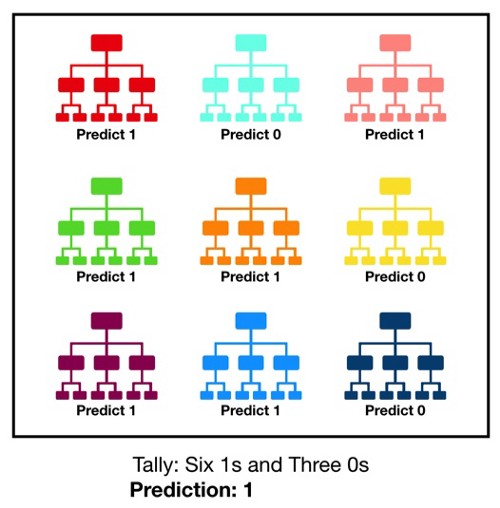 

Fonte da imagem: [Towards Data Science](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)



## Inicializando o modelo e avaliando sua acurácia
Com o modelo a ser utilizado já definido, precisamos inicializar o mesmo e logo em seguida avaliar a precisão que este modelo pode alcançar utilizando os dados alocados para teste.

In [5]:
randomForest_classifier = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8304,0.9139,0.8431,0.7963,0.8190,0.6596,0.6606
1,0.8482,0.9159,0.8824,0.8036,0.8411,0.6964,0.6992
2,0.8393,0.9171,0.8235,0.8235,0.8235,0.6760,0.6760
3,0.8393,0.9061,0.8039,0.8367,0.8200,0.6749,0.6754
4,0.8214,0.8938,0.7451,0.8444,0.7917,0.6365,0.6403
5,0.8214,0.9105,0.7843,0.8163,0.8000,0.6388,0.6392
6,0.8304,0.8949,0.7843,0.8333,0.8081,0.6563,0.6573
7,0.7857,0.8662,0.7500,0.7800,0.7647,0.5681,0.5685
8,0.8125,0.8627,0.7308,0.8444,0.7835,0.6197,0.6247
9,0.8108,0.8917,0.8431,0.7679,0.8037,0.6219,0.6244


Com apenas uma única linha de código, foi possível construir um classificador utilizando o modelo de Random Forest. Para avaliarmos o desempenho desse classificador podemos utilizar a linha abaixo e observar o desempenho do classificardor com base nos conjunto de treinamento gerado automaticamente pelo PyCaret:

In [6]:
evaluate_model(randomForest_classifier) ## Avaliando o modelo

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Para verificarmos o real desempenho do classificador para um conjunto de dados que não foi utilizado durante o treinamento, podemos utilizar a função predict_model() que utilizará como base os dados do conjunto de testes.

In [7]:
predict_model(randomForest_classifier)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7771,0.8780,0.7112,0.8049,0.7551,0.5520,0.5556


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,Bom,Bom,0.79
1,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,Ruim,Ruim,0.95
2,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,Ruim,Ruim,0.83
3,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,Bom,Bom,0.95
4,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3,Ruim,Bom,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,Bom,Bom,0.77
476,12.3,0.50,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,Ruim,Ruim,0.97
477,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,Bom,Bom,0.77
478,9.8,0.30,0.39,1.7,0.062,3.0,9.0,0.99480,3.14,0.57,11.5,Bom,Bom,0.88


## Salvando o modelo
O passo seguinte é salvar o modelo criado para podermos reaproveitar em uma aplicação.

In [8]:
save_model(randomForest_classifier, model_name = 'random_forest_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

Será criado um arquivo com nome random_forest_model.pkl na raiz do diretório onde este script está sendo executado, este é o nosso modelo pronto para ser utilizado em alguma aplicação que permita a interação com o usuário.

## Utilizando o modelo em uma aplicação final
Prosseguimos com a criação da nossa aplicação para a classificação de vinhos, esta aplicação permitirá ao usuário selecionar os parâmetros de um vinho e o nosso classificador irá classificar o vinho em questão em Bom ou Ruim.

![tela](images/screen.png)

Utilizaremos a biblioteca Streamlit, uma biblioteca que permite a criação de aplicações web com poucas linhas de código e de uma forma simplificada, similar ao que temos como o Flask. Um detalhe importante é que a construção do código se encotnrará no arquivo aplication.py e conterá todos os trechos de códigos referenciados a seguir. 

Começamos importando as bibliotecas e definindo as funções que serão responsáveis pela predição da qualidade e a definição de quais características estarão disponíveis na barra lateral para o usuário poder interagir.

In [9]:
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd


def predict_quality(model, df):
    
    predictions_data = predict_model(estimator = model, data = df)
    return predictions_data['Label'][0]

def define_features():
    fixed_acidity = st.sidebar.slider(label='Fixed Acidity', min_value=4.0,
                                      max_value=16.0,
                                      value=10.0,
                                      step=0.1)

    volatile_acidity = st.sidebar.slider(label='Volatile Acidity', min_value=0.00,
                                         max_value=2.00,
                                         value=1.00,
                                         step=0.01)

    citric_acid = st.sidebar.slider(label='Citric Acid', min_value=0.00,
                                    max_value=1.00,
                                    value=0.50,
                                    step=0.01)

    residual_sugar = st.sidebar.slider(label='Residual Sugar', min_value=0.0,
                                       max_value=16.0,
                                       value=8.0,
                                       step=0.1)

    chlorides = st.sidebar.slider(label='Chlorides', min_value=0.000,
                                  max_value=1.000,
                                  value=0.500,
                                  step=0.001)

    f_sulf_diox = st.sidebar.slider(label='Free Sulfur Dioxide', min_value=1,
                                    max_value=72,
                                    value=36,
                                    step=1)

    t_sulf_diox = st.sidebar.slider(label='Total Sulfur Dioxide', min_value=6,
                                    max_value=289,
                                    value=144,
                                    step=1)

    density = st.sidebar.slider(label='Density', min_value=0.0000,
                                max_value=2.0000,
                                value=0.9900,
                                step=0.0001)

    ph = st.sidebar.slider(label='pH', min_value=2.00,
                           max_value=5.00,
                           value=3.00,
                           step=0.01)

    sulphates = st.sidebar.slider(label='Sulphates', min_value=0.00,
                                  max_value=2.00,
                                  value=0.50,
                                  step=0.01)

    alcohol = st.sidebar.slider(label='Alcohol', min_value=8.0,
                                max_value=15.0,
                                value=10.5,
                                step=0.1)
    return {'fixed acidity': fixed_acidity, 'volatile acidity': volatile_acidity,
            'citric acid': citric_acid, 'residual sugar': residual_sugar,
            'chlorides': chlorides, 'free sulfur dioxide': f_sulf_diox,
            'total sulfur dioxide': t_sulf_diox, 'density': density,
            'pH': ph, 'sulphates': sulphates, 'alcohol': alcohol
            }
            

O passo seguinte será definir o modelo que nossa aplicação irá utilizar, vamos selecionar o random_forest_model que é o modelo criado anteriormente para o nosso estudo de caso.

In [10]:
model = load_model('random_forest_model')

2020-12-28 12:01:35.104 INFO    logs: Initializing load_model()
2020-12-28 12:01:35.107 INFO    logs: load_model(model_name=random_forest_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Também vamos definir o título da aplicação e uma breve explicação descrevendo como a aplicação funciona. Vamos aproveitar e definir os parâmetros que estarão disponíveis para o usuário poder selecionar na págia e que será nossa entrada de dados para o classificador.

In [11]:
st.title('Classificador de vinhos')
st.write('Este app tem o objetivo de classificar vinhos com base nas características fornecidas pelo usuário.\
         Por favor, ajuste os parâmetros de cada característica que referentes ao vinho que se deseja classificar. Após isto, clique em Classificar.')
         

                          
features = define_features()
 

features_df = pd.DataFrame([features])

st.table(features_df)  

Finalizamos definindo um botão que executará a ação de classificar o vinho ao ser pressionado.

In [12]:
if st.button('Classificar'):
    
    prediction = predict_quality(model, features_df)
    st.write(' Baseado nos parâmetros passados, a qualidade do vinho é '+ str(prediction))

Pronto, para executarmos o código e abrir o servidor, basta executar a linha abaixo:

    streamlit run aplication.py
    
Caso queira executar diretamente por meio de um script em python, utilize o arquivo runner.py:

    python3 runner.py

## Fontes
Tutorial criado com base no material disponível em [Towards Data Science](https://towardsdatascience.com/pycaret-and-streamlit-how-to-create-and-deploy-data-science-web-app-273d205271a3)

Dataset disponível em [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)